In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.sans-serif']=['SimHei']

In [2]:
data=pd.read_csv(r"D:\jupyter name\数据\train.csv")

In [3]:
data.shape

(593994, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    593994 non-null  int64  
 1   annual_income         593994 non-null  float64
 2   debt_to_income_ratio  593994 non-null  float64
 3   credit_score          593994 non-null  int64  
 4   loan_amount           593994 non-null  float64
 5   interest_rate         593994 non-null  float64
 6   gender                593994 non-null  object 
 7   marital_status        593994 non-null  object 
 8   education_level       593994 non-null  object 
 9   employment_status     593994 non-null  object 
 10  loan_purpose          593994 non-null  object 
 11  grade_subgrade        593994 non-null  object 
 12  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 58.9+ MB


In [5]:
data.columns

Index(['id', 'annual_income', 'debt_to_income_ratio', 'credit_score',
       'loan_amount', 'interest_rate', 'gender', 'marital_status',
       'education_level', 'employment_status', 'loan_purpose',
       'grade_subgrade', 'loan_paid_back'],
      dtype='object')

## 数据处理

In [6]:
data=data.drop('id',axis=1)

In [7]:
columns=['年收入','债务收入比','信用分','贷款金额','利率','性别','婚姻状态',
        '教育程度','就业状态','贷款目的','等级','贷款是否偿还']
data.columns=columns

In [8]:
data.isnull().sum()

年收入       0
债务收入比     0
信用分       0
贷款金额      0
利率        0
性别        0
婚姻状态      0
教育程度      0
就业状态      0
贷款目的      0
等级        0
贷款是否偿还    0
dtype: int64

In [9]:
data.duplicated().sum()

np.int64(0)

通过describe，可以了解平均值，标准差，最小最大值，以及分位数，帮助我们大体上了解数据

In [10]:
data.describe()

,年收入,债务收入比,信用分,贷款金额,利率,贷款是否偿还
count,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000
mean,48212.202976,0.120696,680.916009,15020.297629,12.356345,0.798820
std,26711.942078,0.068573,55.424956,6926.530568,2.008959,0.400883
min,6002.430000,0.011000,395.000000,500.090000,3.200000,0.000000
25%,27934.400000,0.072000,646.000000,10279.620000,10.990000,1.000000
50%,46557.680000,0.096000,682.000000,15000.220000,12.370000,1.000000
75%,60981.320000,0.156000,719.000000,18858.580000,13.680000,1.000000
max,393381.740000,0.627000,849.000000,48959.950000,20.990000,1.000000


In [11]:
data.head()

,年收入,债务收入比,信用分,贷款金额,利率,性别,婚姻状态,教育程度,就业状态,贷款目的,等级,贷款是否偿还
0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [12]:
back=data[data['贷款是否偿还'].isin([1])]
unback=data[data['贷款是否偿还'].isin([0])]

In [13]:
len(back),len(unback)

(474494, 119500)

## 数值型特征深度分析

### 用热力图对数值进行分析

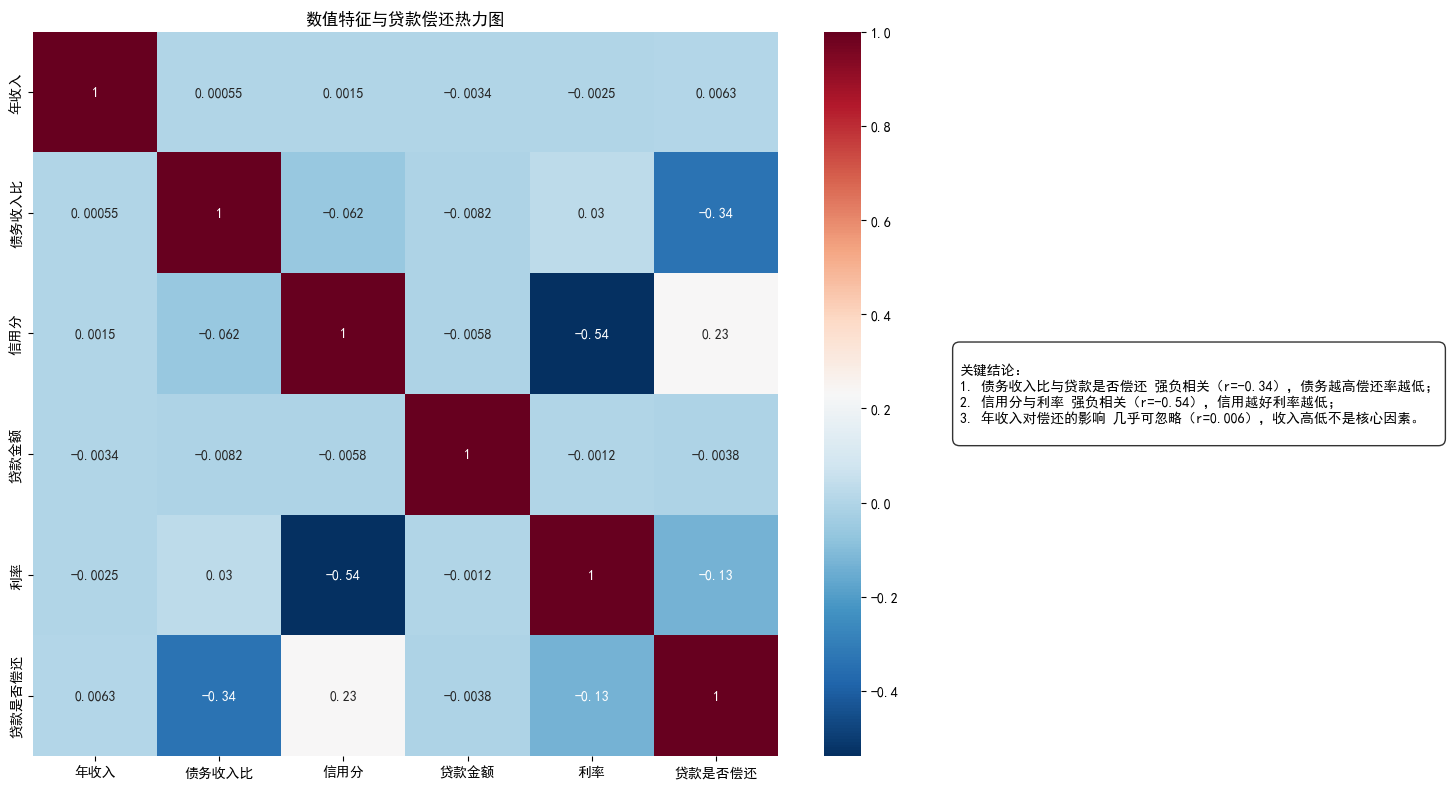

<Figure size 640x480 with 0 Axes>

In [14]:
corr_matrix=data.select_dtypes(['number']).corr()
fig,(ax_heat,ax_ann)=plt.subplots(1,2,figsize=(15,8),gridspec_kw={'width_ratios': [3, 1]})
sns.heatmap(corr_matrix,annot=True,cmap='RdBu_r',ax=ax_heat)
ax_heat.set_title('数值特征与贷款偿还热力图')
annotation_text = """
关键结论：
1. 债务收入比与贷款是否偿还 强负相关（r=-0.34），债务越高偿还率越低；
2. 信用分与利率 强负相关（r=-0.54），信用越好利率越低；
3. 年收入对偿还的影响 几乎可忽略（r=0.006），收入高低不是核心因素。
"""
# 设置注释的位置、样式（x坐标设为图右侧，y坐标居中，用边框突出显示）
ax_ann.text(0.1, 0.5, annotation_text, 
         fontsize=10, 
         verticalalignment='center', 
         bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.8))
ax_ann.axis('off')

plt.tight_layout()
plt.show()

plt.tight_layout()

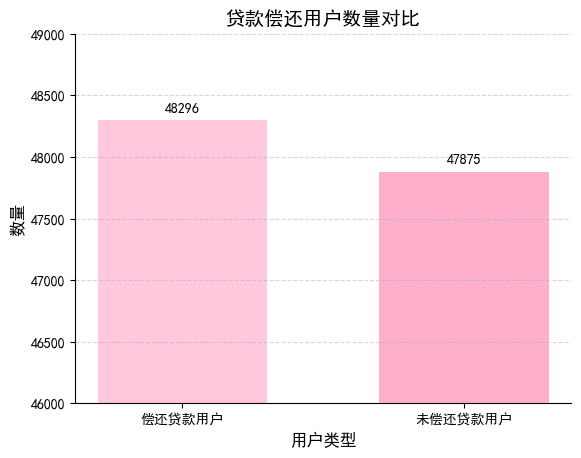

In [15]:
a=back['年收入'].mean()
b=unback['年收入'].mean()
labels=['偿还贷款用户','未偿还贷款用户']
heights=[a,b]
plt.ylim(46000,49000)
plt.title('贷款偿还用户数量对比', fontsize=14, fontweight='bold')
plt.xlabel('用户类型', fontsize=12)
plt.ylabel('数量', fontsize=12)
plt.bar(labels,heights,width=0.6,color=['#ffc8dd', '#ffafcc'])
ax=plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for x,y in enumerate(heights):
    plt.text(x,y+100,f'{int(y)}',ha='center',va='center',fontsize=10)
plt.grid(axis='y',linestyle='--',alpha=0.5)
plt.show()

In [16]:
a1=round((back['婚姻状态'].value_counts()*100)/len(back),2)
b1=round((unback['婚姻状态'].value_counts()*100)/len(unback),2)

In [17]:
a1=a1.sort_values()
b1=b1.sort_values()
c1=pd.concat([a1,b1],axis=1)


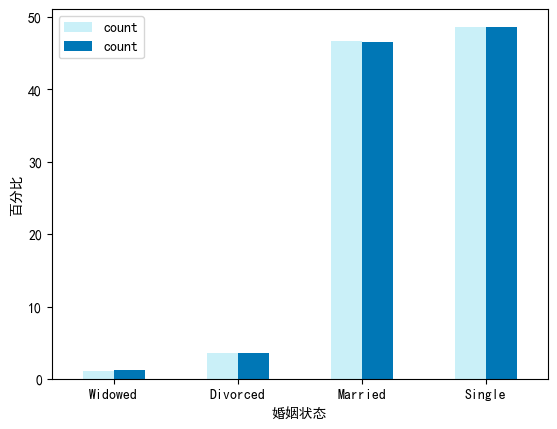

In [18]:
c1.plot(kind='bar',color=['#caf0f8','#0077b6'])
plt.xticks(rotation=0)
plt.ylabel('百分比')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [19]:
data.head()

,年收入,债务收入比,信用分,贷款金额,利率,性别,婚姻状态,教育程度,就业状态,贷款目的,等级,贷款是否偿还
0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


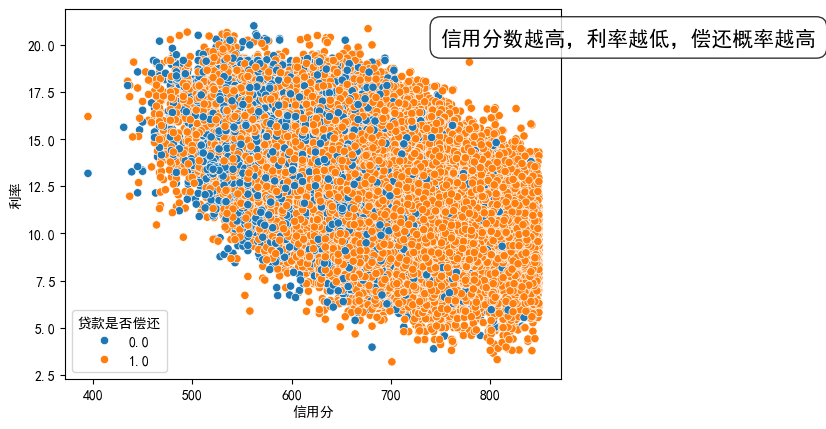

In [20]:
sns.scatterplot(x='信用分',y='利率',data=data,hue='贷款是否偿还')
plt.text(750,20,'信用分数越高，利率越低，偿还概率越高',fontsize=15,
        bbox=dict(boxstyle='round,pad=0.5',facecolor='white',alpha=0.8))

plt.show()

In [21]:
a2=back['债务收入比'].mean()
b2=unback['债务收入比'].mean()

In [22]:
a2,b2

(np.float64(0.10914412449893993), np.float64(0.16656403841004183))

未偿还客户的债务收入比要高于偿还用户

## 分类型特征差异对比

In [23]:
back['教育程度'].value_counts()

教育程度
Bachelor's     220579
High School    148654
Master's        74696
Other           21416
PhD              9149
Name: count, dtype: int64

In [24]:
a3=round((back['教育程度'].value_counts()*100)/len(back),2)
b3=round((unback['教育程度'].value_counts()*100)/len(unback),2)

In [25]:
a3,b3

(教育程度
 Bachelor's     46.49
 High School    31.33
 Master's       15.74
 Other           4.51
 PhD             1.93
 Name: count, dtype: float64,
 教育程度
 Bachelor's     49.39
 High School    29.24
 Master's       15.40
 Other           4.40
 PhD             1.57
 Name: count, dtype: float64)

Text(15, 4, '教育程度对贷款的偿还关系不大')

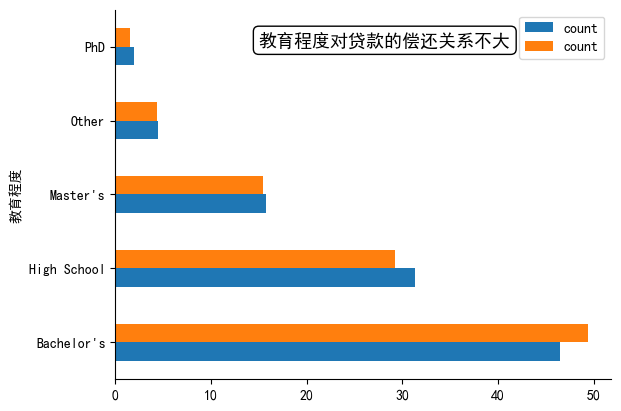

In [26]:
c3=pd.concat([a3,b3],axis=1)
ax=c3.plot(kind='barh')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.text(15,4,'教育程度对贷款的偿还关系不大',fontsize=13,bbox=dict(boxstyle=('round'),facecolor='white'))

教育程度对贷款的偿还关系不大

In [27]:
_gender=data['性别'].value_counts()

(array([0, 1, 2]),
 [Text(0, 0, 'Female'), Text(1, 0, 'Male'), Text(2, 0, 'Other')])

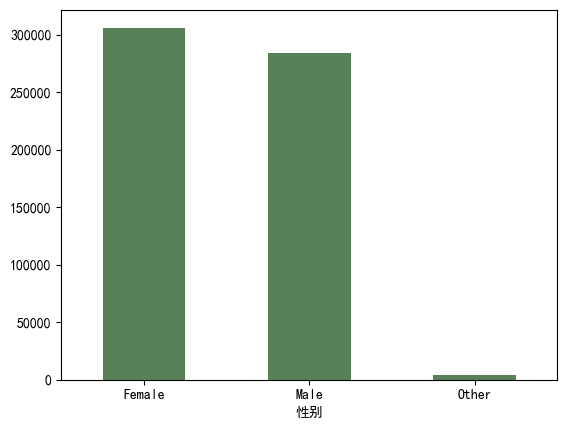

In [28]:
_gender.plot(kind='bar',color='#588157')
plt.xticks(rotation=0)

性别对贷款的偿还关系也不大

In [29]:
a4=round((back['就业状态'].value_counts()*100)/len(back),2)
b4=round((unback['就业状态'].value_counts()*100)/len(unback),2)

In [30]:
df_a4=a4.to_frame(name='偿还就业占比')
df_b4=b4.to_frame(name='未偿还就业占比')

In [31]:
c=pd.concat([df_a4,df_b4],axis=1)

In [32]:
ax.patch

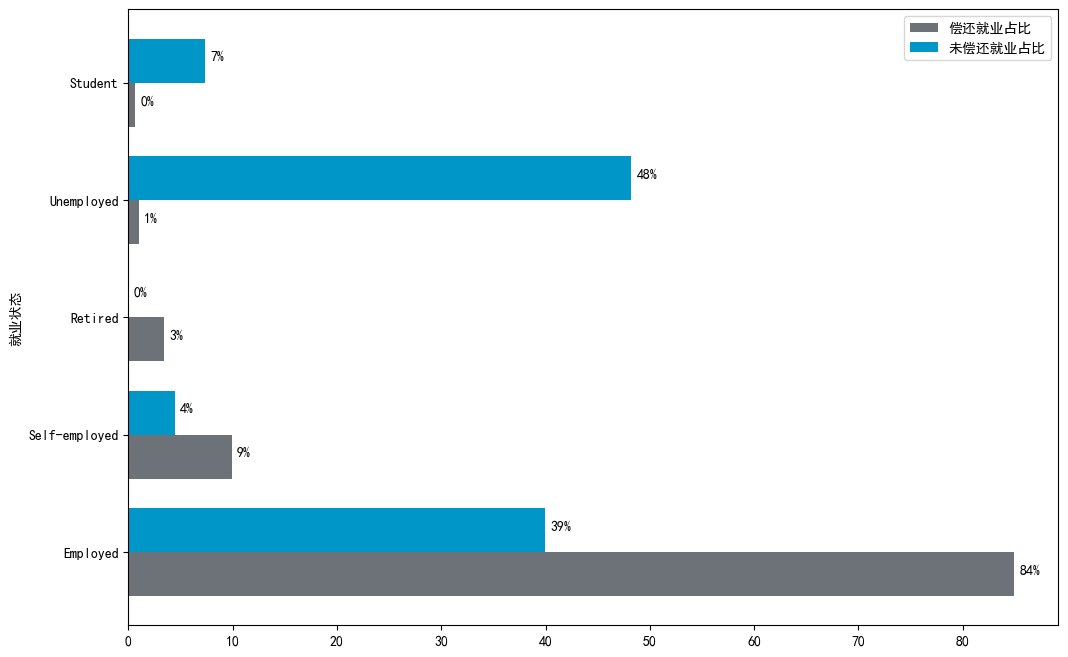

In [33]:
fig,ax=plt.subplots(figsize=(12,8))
c.plot(kind='barh',color=['#6d7278','#0096c7'],width=0.75,ax=ax)
for bar in ax.patches:
    width=bar.get_width()
    ax.text(width+0.5,bar.get_y()+bar.get_height()/2,f'{int(width)}%')

## 结论

### 可以审查贷款人员的工作状态和员工的信用分，将这两项作为是否给予贷款的主要参考